In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
import tensorflow as tf
from  tensorflow import keras

In [99]:
print(tf.__version__)

2.2.0


In [100]:
print(keras.__version__)

2.3.0-tf


In [101]:
#load fashion mnist datasets
fashion_mnist = keras.datasets.fashion_mnist

In [102]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

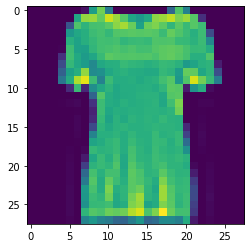

In [103]:
plt.imshow(X_train_full[10])

In [104]:
y_train_full[10]

0

In [105]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [106]:
class_names[y_train_full[10]]

'T-shirt/top'

In [107]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [108]:
#Normalization
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [109]:
#Split data into valid and train datasets
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n 

In [110]:
X_valid.shape
X_train.shape

(55000, 28, 28)

In [111]:
y_valid.shape
y_train.shape

(55000,)

In [112]:
np.random.seed(42)
tf.random.set_seed(42)

In [113]:
model =keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


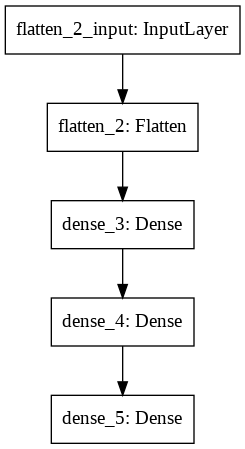

In [115]:
import pydot
keras.utils.plot_model(model)

In [116]:
weigths, biases = model.layers[1].get_weights()

In [117]:
weigths

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [118]:
weigths.shape

(784, 300)

In [119]:
print(biases)
biases.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(300,)

In [120]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [127]:
model_history =model.fit(X_train,y_train,epochs=30,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2203 - accuracy: 0.9205 - val_loss: 0.2890 - val_accuracy: 0.8958
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2172 - accuracy: 0.9218 - val_loss: 0.2923 - val_accuracy: 0.8970
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2138 - accuracy: 0.9226 - val_loss: 0.3709 - val_accuracy: 0.8668
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2100 - accuracy: 0.9251 - val_loss: 0.2950 - val_accuracy: 0.8968
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2081 - accuracy: 0.9246 - val_loss: 0.2799 - val_accuracy: 0.8980
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2028 - accuracy: 0.9271 - val_loss: 0.3021 - val_accuracy: 0.8906
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2003 - accuracy: 0.9296 - val_loss: 0.2928 - val_accuracy:

In [122]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [123]:
model.history.history

{'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8456363677978516,
  0.8565272688865662,
  0.8620727062225342,
  0.8676363825798035,
  0.8715636134147644,
  0.8749091029167175,
  0.8790000081062317,
  0.8821454644203186,
  0.8840909004211426,
  0.8864727020263672,
  0.8894909024238586,
  0.8918727040290833,
  0.8936908841133118,
  0.8973454833030701,
  0.8981272578239441,
  0.9000181555747986,
  0.9024909138679504,
  0.9038909077644348,
  0.905927300453186,
  0.9071999788284302,
  0.9085090756416321,
  0.9102181792259216,
  0.9122181534767151,
  0.9140363931655884,
  0.9159636497497559,
  0.916454553604126,
  0.9188363552093506,
  0.9194909334182739],
 'loss': [0.7237027883529663,
  0.48421019315719604,
  0.4391120970249176,
  0.4123016595840454,
  0.39368903636932373,
  0.3750606179237366,
  0.3629836440086365,
  0.3515518605709076,
  0.3411664664745331,
  0.3317622244358063,
  0.3237345814704895,
  0.31454625725746155,
  0.30773770809173584,
  0.3018375337123871,
  0.29435

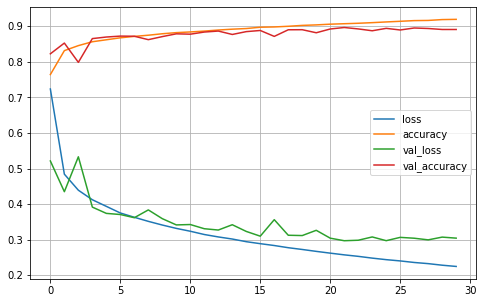

In [124]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_yline(0,1)
plt.show()

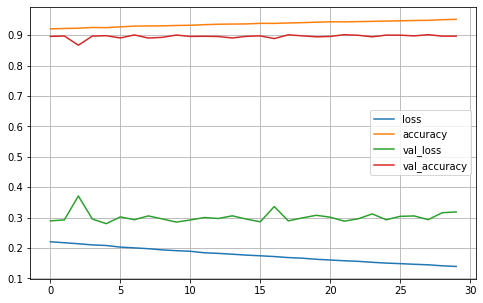

In [128]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_yline(0,1)
plt.show()

In [129]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8873


[0.3580271601676941, 0.8873000144958496]

In [130]:
x_New = X_test[:3]

In [132]:
y_proba = model.predict(x_New)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [137]:
#y_pred = model.predict_classes(x_New)
#y_pred
y_pred = np.argmax(model.predict(x_New), axis=1)
y_pred

array([9, 2, 1])

In [138]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

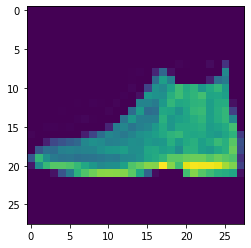

In [139]:
plt.imshow(X_test[0])

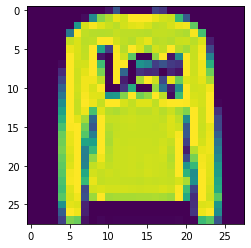

In [140]:
plt.imshow(X_test[1])

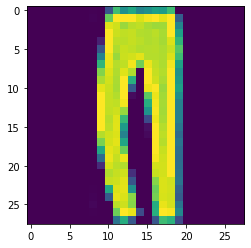

In [141]:
plt.imshow(X_test[2])